# SOCIAL ANXIETY PREVENTION RECOMMENDER

## PROBLEM STATEMENT 

With over 5 million Kenyans struggling with anxiety disorders, MindGuard revolutionizes mental health through an intelligent early-warning system. Using Feedforward Neural Networks to interpret complex behavioral patterns, MindGuard detects anxiety risks and delivers personalized preventative interventions, helping individuals maintain optimal mental wellness before clinical intervention becomes necessary.

## OBJECTIVES

1. Can we create an intelligent early-warning system that accurately predicts who is likely to experience anxiety problems, allowing for timely prevention and support?

2. How can we provide personalized lifestyle recommendations that are most likely to help individuals reduce their anxiety risk based on their unique profile?

3. Which lifestyle factors have the biggest impact on anxiety and how can these insights guide effective prevention strategies and public health initiatives?




## PLAN OF EXECUTION

- EDA 
- PREPROCESSING
- MODEL BUILDING
- MODEL INTERPRETATION 
- DEPLOYMENT



## EDA AND PREPROCESSING

### Load Dataset

In [1]:
#import needed libraries and load datasets to be used
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


enhanced_data = pd.read_csv('enhanced_anxiety_dataset.csv')
family_data = pd.read_csv('family_anxiety_14_dataset.csv')



### Perusing Data


Glancing at the dataset and what it entails to help guide on how we will execute our objectives

In [2]:
#Print first rows of enhanced anxiety dataset
enhanced_data.head()


,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [3]:
#Scheme the data types of the enhanced dataset
enhanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [4]:
#Summary stats for enhanced dataset
enhanced_data.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


In [5]:
#Check for missing values
enhanced_data.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

### Preprocessing pipelines and Modeling using ensemble methods 

This defined broke down the features into 2 Feature categories. We then proceeded to carrying out Preprocessing and Modeling using Random Forest based on the Objectives of the project

In [6]:
#Define feature categories
ls_features = ['Age', 'Gender', 'Occupation',
    'Sleep Hours', 'Physical Activity (hrs/week)', 
    'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
    'Smoking', 'Family History of Anxiety', 'Stress Level (1-10)',  'Recent Major Life Event',
    'Diet Quality (1-10)'
]
physiological_features = ['Heart Rate (bpm)', 'Breathing Rate (breaths/min)', 'Sweating Level (1-5)','Dizziness']

all_features = ls_features + physiological_features

In [7]:
enhanced_data[all_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Recent Major Life Event            11000 non-null  object 
 11  Diet Quality (1-10)                11000 non-null  int

In [8]:
#Split data into features and target variable
anxiety_thresh = 5
X_lifestyle= enhanced_data[ls_features].copy()
X = enhanced_data[all_features].copy()

y_bin = (enhanced_data['Anxiety Level (1-10)'] >= anxiety_thresh).astype(int)
y = enhanced_data['Anxiety Level (1-10)'].values



In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Recent Major Life Event            11000 non-null  object 
 11  Diet Quality (1-10)                11000 non-null  int

In [10]:
#Identify Categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns

In [11]:
print("Numerical transformer:", num_features.tolist())
print("Categorical transformer:", categorical_features.tolist())

Numerical transformer: ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)', 'Diet Quality (1-10)', 'Heart Rate (bpm)', 'Breathing Rate (breaths/min)', 'Sweating Level (1-5)']
Categorical transformer: ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety', 'Recent Major Life Event', 'Dizziness']


In [12]:
# Define preprocessing steps for numerical and categorical features


early_preprocessing = ColumnTransformer(
    transformers=[ ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
)


In [13]:
#Split the data into training and testing sets
X_train_rf,X_test_rf,y_train_bin_rf,y_test_bin_rf = train_test_split(X_lifestyle,y_bin, test_size=0.2, random_state=42, stratify=y_bin)


In [14]:

X_train_all,X_test_all,y_train_all,y_test_all = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
print("Available columns in X_train_rf:")
print(X_train_rf.columns.tolist())

Available columns in X_train_rf:
['Age', 'Gender', 'Occupation', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Smoking', 'Family History of Anxiety', 'Stress Level (1-10)', 'Recent Major Life Event', 'Diet Quality (1-10)']


In [ ]:
# Objective 1: Early Detection of Anxiety using Random Forest Classifier
# Create a pipeline with preprocessing and classifier
early_pip =Pipeline([
    ('preprocessing', early_preprocessing),
    ('classifier', RandomForestClassifier(n_estimators=200, 
     max_depth=15, min_samples_split=5, random_state=42, class_weight='balanced'))
])

early_pip.fit(X_train_rf, y_test_bin_rf)
early_pred = early_pip.predict(X_test_rf)
early_acc= accuracy_score(y_test_bin_rf,early_pred)


In [19]:
print(f"RF Early Detection Accuracy: {early_acc: .4f}")
print(classification_report(y_test_bin_rf,early_pred, target_names=['Low Anxiety', 'High Anxiety']))

RF Early Detection Accuracy:  0.8218
              precision    recall  f1-score   support

 Low Anxiety       0.87      0.88      0.87      1524
High Anxiety       0.72      0.70      0.71       676

    accuracy                           0.82      2200
   macro avg       0.79      0.79      0.79      2200
weighted avg       0.82      0.82      0.82      2200



In [20]:

# Create a pipeline with preprocessing and classifier
rf_rec_pipeline = Pipeline([
	('preprocessing', early_preprocessing),
	('classifier', RandomForestRegressor(random_state=42, n_estimators=200, max_depth=20, min_samples_split=2))
])



In [21]:
#Objective 2: Personalized recommendations for anxiety management
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

#Fit the pipeline to the training data
rf_rec_pipeline.fit(X_train_all,y_train_all)

#Test predictions and evaluate the model
y_pred = rf_rec_pipeline.predict(X_test_all)

#Evaluate model performance
rf_rmse = np.sqrt(mean_squared_error(y_test_all, y_pred))
r2 = r2_score(y_test_all, y_pred)

In [22]:
print(f"RF Regression RMSE: {rf_rmse: .4f}")
print(f"RF Regression R^2: {r2: .4f}")

RF Regression RMSE:  1.0344
RF Regression R^2:  0.7691


In [23]:
#Objective 3: Lifestyle Analysis
rf_feature_names = (list(num_features) + list(early_preprocessing.named_transformers_['cat'].get_feature_names_out(categorical_features)))

In [25]:
rf_importance = rf_rec_pipeline.named_steps['classifier'].feature_importances_

rf_importance_df = pd.DataFrame({'feature' : rf_feature_names,
                                 'importance': rf_importance}).sort_values('importance', ascending=False)

In [26]:
print("Top 10 RF Feature Importances:")
print(rf_importance_df.head(10))


Top 10 RF Feature Importances:
                             feature  importance
5                Stress Level (1-10)    0.472745
1                        Sleep Hours    0.224334
3           Caffeine Intake (mg/day)    0.078248
6                Diet Quality (1-10)    0.040395
2       Physical Activity (hrs/week)    0.029193
7                   Heart Rate (bpm)    0.027434
0                                Age    0.025206
4  Alcohol Consumption (drinks/week)    0.019141
8       Breathing Rate (breaths/min)    0.018611
9               Sweating Level (1-5)    0.014937


<Axes: ylabel='feature'>

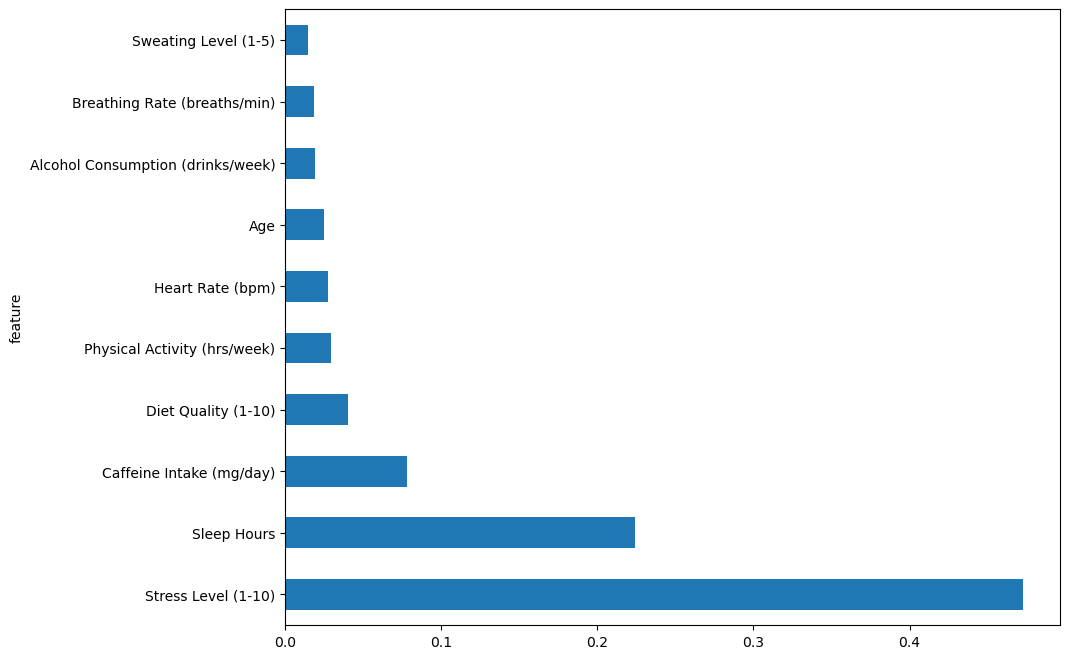

In [28]:
#Visualize feature importances
fig, ax = plt.subplots(figsize=(10, 8))
axes = [ax]

rf_importance_df.head(10).plot(kind='barh', x='feature', y='importance', ax=axes[0], legend=False)




In [33]:
#Random Forest Performance Summary
rf_metrics = ['Early Warning\nAccuracy', 'Regression\nRMSE', 'Regression\nR²']
rf_values = [early_acc, rf_rmse, r2]
colors = ['lightblue', 'lightcoral', 'lightgreen']

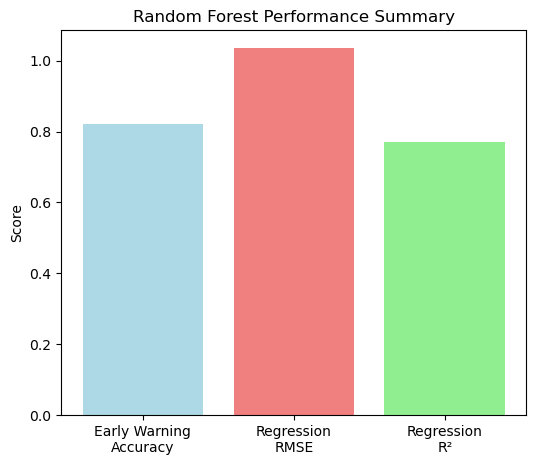

In [36]:
fig_perf, ax_perf = plt.subplots(figsize=(6, 5))
bars = ax_perf.bar(rf_metrics, rf_values, color=colors)
ax_perf.set_title('Random Forest Performance Summary')
ax_perf.set_ylabel('Score')
plt.show()

In [29]:
#Performance summary
print(f"RF Early Detection Accuracy: {early_acc: .4f}")
print(classification_report(y_test_bin_rf,early_pred, target_names=['Low Anxiety', 'High Anxiety']))
print("Top 10 RF Feature Importances:")
print(rf_importance_df.head(10))



RF Early Detection Accuracy:  0.8218
              precision    recall  f1-score   support

 Low Anxiety       0.87      0.88      0.87      1524
High Anxiety       0.72      0.70      0.71       676

    accuracy                           0.82      2200
   macro avg       0.79      0.79      0.79      2200
weighted avg       0.82      0.82      0.82      2200

Top 10 RF Feature Importances:
                             feature  importance
5                Stress Level (1-10)    0.472745
1                        Sleep Hours    0.224334
3           Caffeine Intake (mg/day)    0.078248
6                Diet Quality (1-10)    0.040395
2       Physical Activity (hrs/week)    0.029193
7                   Heart Rate (bpm)    0.027434
0                                Age    0.025206
4  Alcohol Consumption (drinks/week)    0.019141
8       Breathing Rate (breaths/min)    0.018611
9               Sweating Level (1-5)    0.014937


## MODEL BUILDING 


## MODEL INTERPRETATION

## CONCLUSION 

## NEXT STEPS